# images.imfit

images.imfit contains three functions for fitting and value replacement.

<a id='notes'></a>

## Notes

**For questions or comments please see** [our github page](https://github.com/spacetelescope/stak).  **We encourage and appreciate user feedback.**

**Most of these notebooks rely on basic knowledge of the Astropy FITS I/O module.  If you are unfamiliar with this module please see the** [Astropy FITS I/O user documentation](http://docs.astropy.org/en/stable/io/fits/) **before using this documentation**.

The fitting and replacement functionality of images.imfit can be replaced using tools available in [Astropy](http://docs.astropy.org/en/stable/modeling/) and [Scipy](https://docs.scipy.org/doc/scipy/reference/interpolate.html).  Please see the linked doc pages for more details.  These fitting functions have a lot more options and function types then what was available in IRAF.

All tasks in the images.imfit package provide the same function type options.  Here is a conversion for these functions in Python:

* leg - astropy.modeling.polynomial.Legendre1D (or 2D)
* cheb - astropy.modeling.polynomial.Chebyshev1D (or 2D)
* spline1 - scipy.interpolate.UnivariantSpline
* spline3 - scipy.interpolate.CubicSpline

For ngrow the option (not covered here) see ``disk`` and ``dilation`` from [skimage.morphology](http://scikit-image.org/docs/0.13.x/api/skimage.morphology.html?highlight=morphology#module-skimage.morphology)

Contents:

* [fit1d-lineclean](#fit1d-lineclean)
* [imsurfit](#imsurfit)

In [9]:
# Temporarily change default colormap to viridis
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'viridis'

<br>

<br>

<a id='fit1d-lineclean'></a>

## fit1d-lineclean

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

The fit1d task will fit a function to a 1d data array.  The lineclean task will take this same fitting tasks, and return your data array with values outside a certain sigma limit replaced with the fitted values. We can preform both these tasks with ``astropy`` and ``scipy`` functions. You'll find many more models defined in the ``astropy.models`` library [here](http://docs.astropy.org/en/stable/modeling/#module-astropy.modeling)

Below we show one example using a Legendre 1D fit, and another example using a linear spine.  For the linear spline example we will go over an implementation of lineclean.

In [10]:
# Standard Imports
import numpy as np
from scipy.interpolate import UnivariateSpline

# Astronomy Specific Imports
from astropy.modeling import models, fitting, polynomial

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

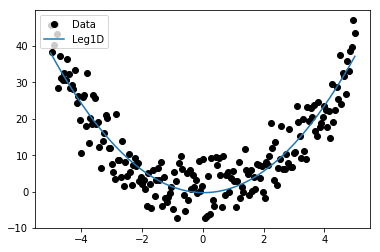

In [11]:
# Fitting - Legendre1D
# This example is taken in part from examples on the Astropy Modeling documentation

# Generate fake data
np.random.seed(0)
x = np.linspace(-5., 5., 200)
y = 0.5 * (3*x**2-1)
y += np.random.normal(0., 5, x.shape)

# Fit the data using the Legendre1D fitter
leg_init = polynomial.Legendre1D(2)
fit_leg = fitting.LevMarLSQFitter()
leg = fit_leg(leg_init, x, y)

# Plot solution
plt.plot(x, y, 'ko', label='Data')
plt.plot(x, leg(x), label='Leg1D')
plt.legend(loc=2)

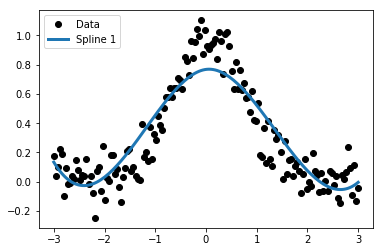

In [12]:
# Fitting - Spline1
# This example is taken in part from examples on the Astropy Modeling documentation

# Generate fake data
np.random.seed(0)
x = np.linspace(-3., 3., 150)
y = np.exp(-x**2) + 0.1 * np.random.randn(150)

# Fit the data using the Spline 1 fitter
spl1 = UnivariateSpline(x, y)
spl1.set_smoothing_factor(3)

# Plot solution
plt.plot(x, y, 'ko', label='Data')
plt.plot(x, spl1(x),lw=3,label='Spline 1')
plt.legend(loc=2)

In [13]:
# Fitting and replacement of outlier values - Spline 1

# Fit array
fit_data = spl1(x)
residuals = fit_data-y
sigma = np.std(residuals)

# Let's reject everything outside of 1-sigma of the fit residuals
boolean_array = [np.absolute(residuals) > sigma]
y[boolean_array] = fit_data[boolean_array]

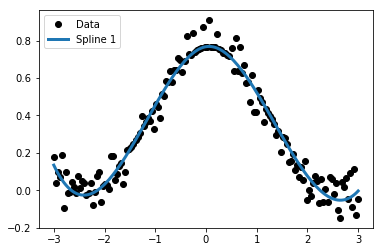

In [14]:
# Plot solution
plt.plot(x, y, 'ko', label='Data')
plt.plot(x, spl1(x),lw=3,label='Spline 1')
plt.legend(loc=2)

<br>

<a id='imsurfit'></a>

## imsurfit

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Imsurfit has similiar functionality to the above tasks, but in 2 dimensions.  Below we show a brief example, which can be extended as shown above in the [lineclean](#fit1d) example.  We use the ``Polynomial2D`` ``astropy.modeling`` example here to showcase the usage of models not found in this IRAF library.

In [1]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.modeling import models, fitting

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

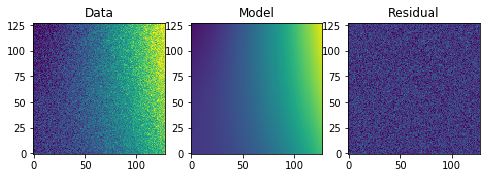

In [2]:
# Fitting - Polynomial2D
# This example is taken from the Astropy Modeling documentation

# Generate fake data
np.random.seed(0)
y, x = np.mgrid[:128, :128]
z = 2. * x ** 2 - 0.5 * y ** 2 + 1.5 * x * y - 1.
z += np.random.normal(0., 0.1, z.shape) * 50000.

# Fit the data using astropy.modeling
p_init = models.Polynomial2D(degree=2)
fit_p = fitting.LevMarLSQFitter()
p = fit_p(p_init, x, y, z)

# Plot the data with the best-fit model
plt.figure(figsize=(8, 2.5))
plt.subplot(1, 3, 1)
plt.imshow(z, origin='lower', interpolation='nearest', vmin=-1e4, vmax=5e4)
plt.title("Data")
plt.subplot(1, 3, 2)
plt.imshow(p(x, y), origin='lower', interpolation='nearest', vmin=-1e4,
           vmax=5e4)
plt.title("Model")
plt.subplot(1, 3, 3)
plt.imshow(z - p(x, y), origin='lower', interpolation='nearest', vmin=-1e4,
           vmax=5e4)
plt.title("Residual")

<br>